<a href="https://colab.research.google.com/github/vn322/RUDN_Lab_Works/blob/main/05_04_2025_%D1%87%D0%B8%D1%81%D0%BB_%D0%B4%D0%B8%D1%84_%D0%B8_%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%B3_%D0%B8_%D0%B4%D0%B8%D1%84_%D1%83%D1%80%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from typing import Callable, Tuple, List
%matplotlib inline

## 3.4

Вычислить первую и вторую производную от таблично заданной функции $y_i = f(x_i), i=0,...,4$ в точке $x = X^\ast$.

In [ ]:
def get_first_derivative(x: list, y: list, seg_num: int) -> float:
    ''' Get the first derivative of a point-defined function in a particular segment. '''

    return (y[seg_num + 1] - y[seg_num])/(x[seg_num + 1] - x[seg_num])


def get_second_derivative(x: list, y: list, seg_num: int) -> float:
    ''' Get the second derivative of a point-defined function in a particular segment. '''

    return 2*(get_first_derivative(x, y, segment_num + 1) - get_first_derivative(x, y, segment_num))/\
           (x[seg_num+2] - x[seg_num])


if __name__ == "__main__":
    x = [1, 2, 3, 4, 5]
    y = [1, 2.6931, 4.0986, 5.3863, 6.6094]
    X = 3

    segment_num = -1
    i = 0
    while i + 1 < len(x) and x[i + 1] < X:
        i += 1

    segment_num = i
    print("Номер отрезка:", segment_num)

    if segment_num + 1 < len(x):
        if X == x[segment_num + 1]:
            if 0 < segment_num < len(x) - 2:
                left_derivative = get_first_derivative(x, y, segment_num)
                right_derivative = get_first_derivative(x, y, segment_num + 1)
                print(f'Левосторонняя производная: {left_derivative}')
                print(f'Правостороняя производная: {right_derivative}')
                derivative = (right_derivative + left_derivative) / 2
                print(f'Первая производная со вторым порядком точности: {derivative}')
                second_derivative = get_second_derivative(x, y, segment_num)
                print(f'Вторая производная: {second_derivative}')
            else:
                print('Краевая точка, производная не определена')
                exit()
        else:
            derivative = get_first_derivative(x, y, segment_num)
            print(f'Первая производная: {derivative}')
            if segment_num + 2 < len(x):
                second_derivative = get_second_derivative(x, y, segment_num)
                print(f'Вторая производная: {second_derivative}')

Номер отрезка: 1
Левосторонняя производная: 1.4055000000000004
Правостороняя производная: 1.2877
Первая производная со вторым порядком точности: 1.3466000000000002
Вторая производная: -0.11780000000000035


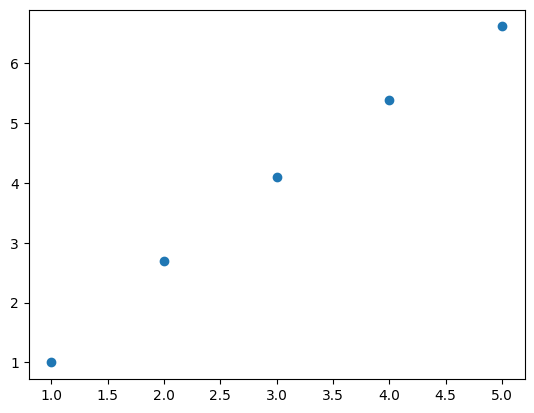

In [ ]:
plt.scatter(x, y)

## 3.5

Вычислить определенный интеграл $F = \int_{x_0}^{x_k} y \,dx$ методами прямоугольников, трапеций, Симпсона с шагами $h_1, h_2$. Оценить погрешность вычислений, используя метод Рунге-Ромберга.

In [ ]:
def rectangle_method(interval: list, f: Callable, h: float) -> float:
    '''
        Estimate the integral of the function f within given interval and step h
        using rectangle method.
    '''

    a, b = interval
    x = np.linspace(a, b, int((b - a) / h + 1))
    I = h * sum([f((i + j) / 2) for i, j in zip(x, x[1:])])
    return I


def trapezium_method(interval: list, f: Callable, h: float) -> float:
    '''
        Estimate the integral of the function f within given interval and step h
        using trapezium method.
    '''

    a, b = interval
    x = np.linspace(a, b, int((b - a) / h + 1))
    y = [f(i) for i in x]

    I = h / 2 * sum([f_i + f_j for f_i, f_j in zip(y[1:], y)])
    return I


def Simpson_method(interval: list, f: Callable, h: float) -> float:
    '''
        Estimate the integral of the function f within given interval and step h
        using Simpson's method.
    '''

    a, b = interval
    n = int((b - a) / h + 1)

    odd = 4 * np.sum([f(a + i * h) for i in range(1, n, 2)])
    even = 2 * np.sum([f(a + i * h) for i in range(2, n - 1, 2)])
    I = h / 3 * (f(a) + odd + even + f(b))
    return I


def Runge_Romberg(I_fh: float, I_fkh: float, k: float, p: float) -> float:
    '''
        Calculate the Runge-Romberg error of integration with method of order p.
        I_fh, I_fkh -- integrals calculated with step h1 and h2 respectively.
        k = h1 / h2.
    '''

    return I_fh + (I_fh - I_fkh) / (k**p - 1)


if __name__ == '__main__':
    interval = [0, 2]
    h = [0.5, 0.25]
    f = lambda x: x / (x**4 + 16)

    methods = {
        'Rectangle method' : [rectangle_method, 1],
        'Trapezium method' : [trapezium_method, 2],
        'Simpson\'s method' : [Simpson_method, 4]
    }

    for method_name, method in methods.items():
        for i in range(len(h)):
            print(f'{method_name} with h = {h[i]}: {method[0](interval, f, h[i])}')
        print(f'Runge-Romberg error: {Runge_Romberg(method[0](interval, f, h[0]), method[0](interval, f, h[1]), h[0] / h[1], method[1])}', end='\n\n')


Rectangle method with h = 0.5: 0.09916217116456566
Rectangle method with h = 0.25: 0.09841958136303793
Runge-Romberg error: 0.0999047609660934

Trapezium method with h = 0.5: 0.09620927564585395
Trapezium method with h = 0.25: 0.09768572340520981
Runge-Romberg error: 0.09571712639273533

Simpson's method with h = 0.5: 0.09825452439055035
Simpson's method with h = 0.25: 0.09817787265832842
Runge-Romberg error: 0.09825963450603181



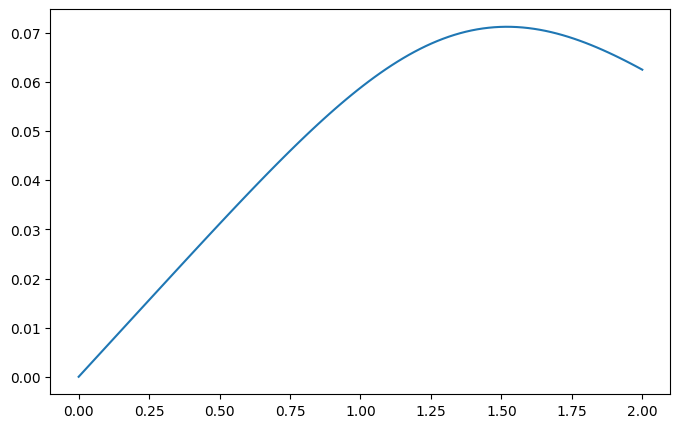

In [ ]:
plt.figure(figsize=(8, 5))
x = np.linspace(*interval, 100)
plt.plot(x, list(map(f, x)))

## 4.1.

Решить задачу Коши методом Эйлера, Рунге-Кутты и Адамса 4-го порядка для обыкновенного дифференциального уравненил первого порядка на указанном отрезке с заданным шагом h. Полученное численное решение сраннить с точным. Определить погрешность решения.

In [3]:
def Euler(f, xa, xb, ya, h):
    n = int((xb - xa) / h)
    x = xa
    y = ya
    x_res = [x]
    y_res = [y]
    y1 = ya
    for i in range(n):
        y1 += h * f(x, y, y1)
        y += h * y1
        x += h
        x_res.append(x)
        y_res.append(y)
    return x_res, y_res


def Runge_Kutta(f, xa, xb, ya, h):
    n = int((xb - xa) / h)
    x = xa
    y = ya
    z = ya
    x_res = [x]
    y_res = [y]
    z_res = [z]
    for i in range(1, n + 1):
        k1 = h * z
        l1 = h * f(x, y, z)
        k2 = h * (z + 0.5 * l1)
        l2 = h * f(x + 0.5 * h, y + 0.5 * k1, z + 0.5 * l1)
        k3 = h * (z + 0.5 * l2)
        l3 = h * f(x + 0.5 * h, y + 0.5 * k2,  z + 0.5 * l2)
        k4 = h * (z + l3)
        l4 = h * f(x + h, y + k3, z + l3)
        x = xa + i * h
        y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        z += (l1 + 2 * l2 + 2 * l3 + l4) / 6
        x_res.append(x)
        y_res.append(y)
        z_res.append(z)
    return (x_res, y_res), z_res


def Adams(f, x, y, h, n, z):
    z = z[:4] + [0] * (len(z) - 4)
    for i in range(3, n):
        z[i + 1] = z[i] + h/24 * (55*f(x[i], y[i], z[i]) - \
                             59*f(x[i - 1], y[i - 1], z[i - 1]) + \
                             37*f(x[i - 2], y[i - 2], z[i - 2]) - \
                             9*f(x[i - 3], y[i - 3], z[i - 3]))
        tmp = y[i] + h/24 * (55*z[i] - 59*z[i - 1] + \
                                  37*z[i - 2] - 9*z[i - 3])
        x.append(x[-1] + h)
        y.append(tmp)
    return x, y


if __name__ == '__main__':
    f = lambda x, y, y_der: 1 / np.sqrt(x) * y_der - 1/(4 * x**2) * (x + np.sqrt(x) - 8) * y
    true_f = lambda x: (x**2 + 1 / x)*np.exp(np.sqrt(x))
    a = 1
    b = 2
    y0 = 1
    y10 = 2 * math.e
    step = 0.1

    res1 = Euler(f, a, b, y0,  step)
    res1_half_h = Euler(f, a, b, y0, step / 2)
    res2, z = Runge_Kutta(f, a, b, y0, step)
    res2_half_h, z_half_h = Runge_Kutta(f, a, b, y0,  step / 2)
    res3 = Adams(f, res2[0][:4], res2[1][:4], step, int((b - a) / step), z)
    res3_half_h = Adams(f, res2[0][:4], res2[1][:4], step / 2,
                        int((b - a) / step), z_half_h)

    results = {
        'Method name' : [],
        'x' : [],
        'y' : [],
        'f(x)' : [],
        '|y - f(x)|' : [],
        'Runge-Romberg error': []
    }

    for i in range(len(res1[0])):
        results['Method name'].append('Euler')
        results['x'].append(res1[0][i])
        results['y'].append(res1[1][i])
        results['f(x)'].append(true_f(res1[0][i]))
        results['|y - f(x)|'].append(abs(res1[1][i] - true_f(res1[0][i])))
        results['Runge-Romberg error'].append((res1_half_h[1][i] - res1[1][i]) / (2**1 - 1))

    for i in range(len(res2[0])):
        results['Method name'].append('Runge-Kutta')
        results['x'].append(res2[0][i])
        results['y'].append(res2[1][i])
        results['f(x)'].append(true_f(res2[0][i]))
        results['|y - f(x)|'].append(abs(res2[1][i] - true_f(res2[0][i])))
        results['Runge-Romberg error'].append((res2_half_h[1][i] - res2[1][i]) / (2**4 - 1))

    for i in range(len(res3[0])):
        results['Method name'].append('Adams')
        results['x'].append(res3[0][i])
        results['y'].append(res3[1][i])
        results['f(x)'].append(true_f(res3[0][i]))
        results['|y - f(x)|'].append(abs(res3[1][i] - true_f(res3[0][i])))
        results['Runge-Romberg error'].append((res3_half_h[1][i] - res3[1][i]) / (2**4 - 1))

In [4]:
pd.DataFrame(results)

,Method name,x,y,f(x),|y - f(x)|,Runge-Romberg error
0,Euler,1.0,1.000000,5.436564,4.436564,0.000000
1,Euler,1.1,1.125000,6.048414,4.923414,-0.068750
2,Euler,1.2,1.275519,6.798434,5.522915,-0.156726
3,Euler,1.3,1.452410,7.690794,6.238384,-0.264712
4,Euler,1.4,1.656762,8.731160,7.074399,-0.393702
5,Euler,1.5,1.889831,9.926285,8.036454,-0.544843
6,Euler,1.6,2.153007,11.283747,9.130740,-0.719397
7,Euler,1.7,2.447786,12.811786,10.364001,-0.918719
8,Euler,1.8,2.775752,14.519195,11.743443,-1.144244
9,Euler,1.9,3.138569,16.415243,13.276674,-1.397472


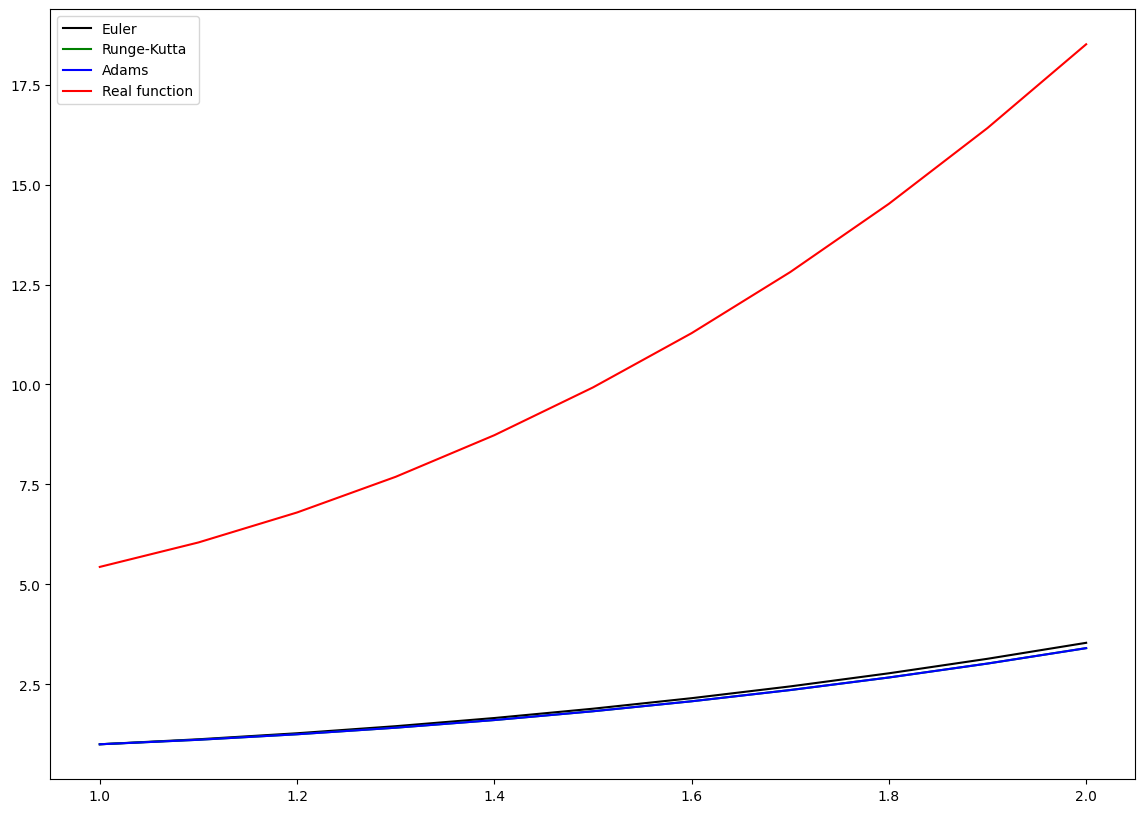

In [5]:
plt.figure(figsize=(14,10))
plt.plot(*res1, color='black', label='Euler')
plt.plot(*res2, color='green', label='Runge-Kutta')
plt.plot(*res3, color='blue', label='Adams')
plt.plot(np.arange(a, b+step, step), list(map(true_f, np.arange(a, b+step, step))), color='red', label='Real function')
plt.legend()
plt.show()